# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">TRAIN MODEL SVC</div>


In [1]:
# Import library needed
import os
import pickle
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Function
def save_pkl(obj: any, name: str):
    """Saves an object to a pickle file, ensuring proper file extension and security.

    Args:
        obj: The object to serialize and save.
        name (str): The desired filename or path.
            - If it doesn't end with ".pkl", `.pkl` will be appended.
            - Supports relative and absolute paths.
        protocol (int, optional): The pickle protocol version to use. Defaults to the
            highest compatible with the current Python version.

    Raises:
        ValueError: If `name` is an empty string or if file operations fail.
        PickleError: If pickling encounters an error.
    """

    
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    if not name.endswith(".pkl"):
        name += ".pkl"

    try:
        with open(name, 'wb') as file:
            pickle.dump(obj, file)
    except (OSError, IOError) as e:
        raise ValueError(f"Failed to save pickle file: {e}") from e
    except pickle.PickleError as e:
        raise pickle.PickleError(f"Pickling error: {e}") from e

    print(f"Saved: \"{name}\"")

def load_pkl(name: str):
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    with open(name, 'rb') as file:
        return pickle.load(file)

def model_information(model, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Overall accuracy model:")
    print(f"Accuracy  = {accuracy*100:<.2f}%")
    print(f"Precision = {precision*100:<.2f}%")
    print(f"Recall    = {recall*100:<.2f}%")
    print(f"F1-score  = {f1*100:<.2f}%\n")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    labels = np.unique(y_test)

    print("Accuracy model for each label:")
    for label in labels:
        idx = np.where(model.classes_ == label)[0][0]
        label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
        print(f"{label:<14s}= {label_accuracy*100:.2f}%")

    heatmap.plot()
    plt.show()


In [2]:
# Read dataset
temp1 = pd.read_csv('egmo_combined.csv')
temp2 = pd.read_csv('imo_combined.csv')
df = pd.concat([temp1, temp2], axis=0)
df.reset_index(drop=True, inplace=True)

df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)

df.shape

(458, 12)

In [3]:
number_of_occurrences = [
    df[df['level'] == 'Easy'].shape[0],
    df[df['level'] == 'Medium'].shape[0],
    df[df['level'] == 'Hard'].shape[0],
    df[df['level'] == 'Very Hard'].shape[0],
]
print(f"Easy      = {number_of_occurrences[0]}")
print(f"Medium    = {number_of_occurrences[1]}")
print(f"Hard      = {number_of_occurrences[2]}")
print(f"Very Hard = {number_of_occurrences[3]}")


Easy      = 56
Medium    = 181
Hard      = 124
Very Hard = 97


c:\Users\victo\anaconda3\envs\artofproblemsolving\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\anaconda3\envs\artofproblemsolving\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Overall accuracy model:
Accuracy  = 50.00%
Precision = 60.00%
Recall    = 50.00%
F1-score  = 53.33%

Accuracy model for each label:
Easy          = 0.00%
Medium        = 66.67%
Very Hard     = 50.00%


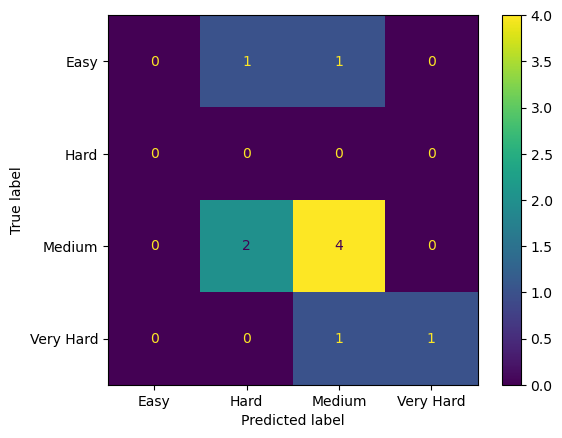

Overall accuracy model:
Accuracy  = 74.78%
Precision = 81.15%
Recall    = 74.78%
F1-score  = 72.65%

Accuracy model for each label:
Easy          = 27.78%
Hard          = 83.06%
Medium        = 96.57%
Very Hard     = 50.53%


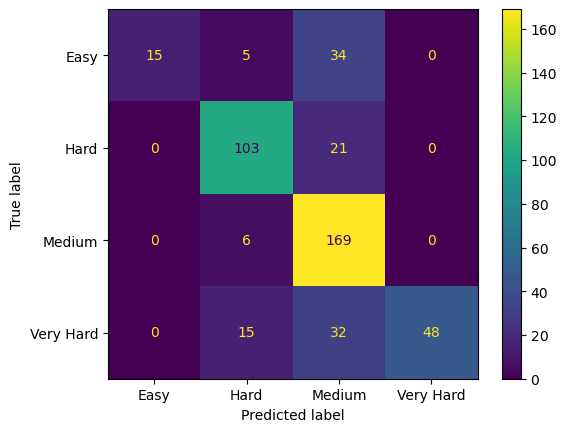

In [4]:
# Split
X, y = df["post_canonical"], df["level"]

# Preprocess text data (Representation text to numeric)
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(X)

# Split training and test
X_train, X_test, y_train, y_test = train_test_split(text_features, y, test_size=0.02, random_state=4)

# Train model
model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
model_information(model, X_test, y_test)
model_information(model, X_train, y_train)
